Populating the interactive namespace from numpy and matplotlib
PoissonSolver: 1 D grid = (250,) with spacings (0.004016064257028112,)

Initializing Poisson solver, type = F
  - creating distance kernel: (499,) 0.0 1.0  [[ elapsed time: 0.426 milli-sec. ]]
  - computing the Green's function: (499,) 0.0 0.5  [[ elapsed time: 0.196 milli-sec. ]]
Poisson solver initialized  [[ elapsed time: 0.837 milli-sec. ]]
PoissonSolver 1 D points = (250,)

Initializing Poisson solver, type = S
  - created pairwise distance matrix: (250, 250) 1e-10 0.994151530375  [[ elapsed time: 0.004 sec. ]]
  - computing the Green's function: (250, 250) 5e-11 0.497075765188  [[ elapsed time: 0.274 milli-sec. ]]
Poisson solver initialized  [[ elapsed time: 0.005 sec. ]]


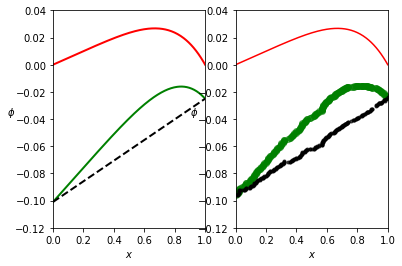

In [1]:
import numpy, scipy
import matplotlib.pyplot as plt

from pynhhd import nPoisson

%pylab inline --no-import-all
numpy.random.seed(0)

# -----------------------------------------------------            
# create a function on regular grid and some unstructured points 

n = 250
dx = (1.-0.) / (n-1.)

x = dx * numpy.arange(n)
f = - numpy.power(x, 3.0)
p = (x - numpy.power(x, 5.0)) / 20.0

ux = numpy.sort(numpy.random.rand(n))
uf = - numpy.power(ux, 3.0)
up = (ux - numpy.power(ux, 5.0)) / 20.0

# -----------------------------------------------------            

fsolver = nPoisson.PoissonSolver(solver='F', grid=(n,), spacings=(dx,))
fsolver.prepare(True)
fp = fsolver.solve(f)

pvols = numpy.gradient(ux)
ssolver = nPoisson.PoissonSolver(solver='S', points=ux, pvolumes=pvols)
ssolver.prepare(True)
ufp = fsolver.solve(uf)

# -----------------------------------------------------
# display the functions
fig = plt.figure()

ax1 = plt.subplot(121)
ax1.plot(x,p,linewidth=2,c='r',label='solution with boundary conditions',)
ax1.plot(x,fp,linewidth=2,c='g',label='solution through nPoissonSolver')
ax1.plot(x, fp-p,'--',linewidth=2,c='k',label='difference')
ax1.set_xlabel('$x$')
ax1.set_ylabel('$\phi$',rotation=0)
ax1.set_xlim(0,1)
ax1.set_ylim(-0.12,0.04)


ax2 = plt.subplot(122)
#ax2.scatter(ux,up,label='solution with boundary conditions',marker='o',c='r',alpha=0.7)
ax2.plot(x,p,label='solution with boundary conditions',c='r')
ax2.scatter(ux,ufp,label='solution through nPoissonSolver',marker='o',c='g',alpha=0.5)
ax2.scatter(ux,ufp-up,c='k',label='difference',marker='.',alpha=0.7)
ax2.set_xlabel('$x$')
ax2.set_ylabel('$\phi$',rotation=0)
ax2.set_xlim(0,1)
ax2.set_ylim(-0.12,0.04)

# -----------------------------------------------------            
# Shrink current axis's height by 10% on the bottom
#box = ax1.get_position()
#ax1.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height * 0.9])

#box = ax2.get_position()
#ax2.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height * 0.9])

# Put a legend below current axis
#ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=3)

# -----------------------------------------------------            
#pvols2 = numpy.gradient(x)
#fig = plt.figure()
#plt.plot(ux,pvols)
#plt.plot(x,pvols2)

plt.show()